# <center>Sklearn e Matplotlib </center>
### <center>Uso das bibliotecas Sklearn com Matplotlib para fazer predict de uma base de dados sobre climas</center>

## Importação das Bibliotecas

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Criação do Dataframe

In [51]:
df = pd.read_csv("./datasets/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv")
df

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


## Pré-processamento dos dados

In [52]:
indices = df.loc[df['Hs'] == -99.900].index
df.drop(indices, inplace = True)

indices = df.loc[df['Peak Direction'] == -99.9].index
df.drop(indices, inplace = True)

indices = df.loc[df['SST'] == -99.9].index
df.drop(indices, inplace = True)

df.drop(columns=['Date/Time'], inplace=True)
df

,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50
...,...,...,...,...,...,...
43723,2.299,3.60,9.281,12.765,94.0,21.95
43724,2.075,3.04,9.303,12.722,95.0,21.95
43725,2.157,3.43,9.168,12.890,97.0,21.95
43726,2.087,2.84,8.706,10.963,92.0,21.95


## Correlação dos dados

In [53]:
correlacao = df.corr()
correlacao

,Hs,Hmax,Tz,Tp,Peak Direction,SST
Hs,1.000000,0.972878,0.403407,0.014793,-0.014867,0.255313
Hmax,0.972878,1.000000,0.371908,0.003088,-0.017473,0.249850
Tz,0.403407,0.371908,1.000000,0.494098,0.141217,0.036914
Tp,0.014793,0.003088,0.494098,1.000000,0.344611,-0.147435
Peak Direction,-0.014867,-0.017473,0.141217,0.344611,1.000000,-0.156752
SST,0.255313,0.249850,0.036914,-0.147435,-0.156752,1.000000


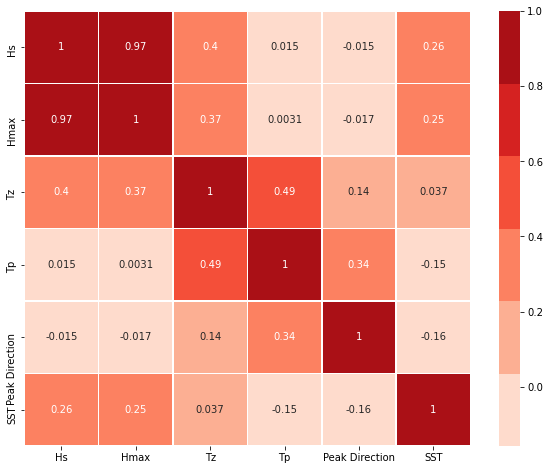

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Reds"), linewidths=.5, annot=True);

## Regressão dos dados

In [212]:
X = df.drop(['Hmax'], axis = 1)
y = df.Hmax

# Dividindo a base de dados entre testes e treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Realizando a regressão linear
Regressao = LinearRegression()

# Treinando os dados
Regressao.fit(x_train,y_train)

# Predizendo dados
Hmax_y_pred = Regressao.predict(x_test)

cont = np.arange(1, 8692, 1)

In [170]:
Resultado_Coeficientes = pd.DataFrame(lr.coef_,x.columns, columns = ["Coeficientes"])
Resultado_Coeficientes

,Coeficientes
Hs,1.668440
Tz,-0.024375
Tp,0.000503
Peak Direction,0.000010
SST,0.000362


In [175]:
print("Erro Quadrático Médio: %f" % mean_squared_error(y_test, Hmax_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coeficiente de Determinação: %f" % r2_score(y_test, Hmax_y_pred))

Erro Quadrático Médio: 0.042527
Coeficiente de Determinação: 0.947271


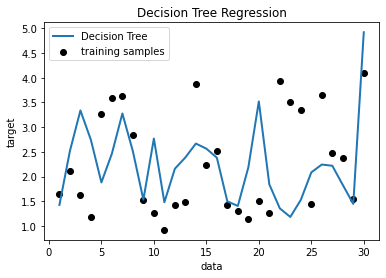

In [211]:
corte = 30 # Corte máximo 8691
plt.figure()
plt.scatter(cont[:corte], y_test.tail(corte), c="k", label="training samples")
plt.plot(cont[:corte], Hmax_y_pred[:corte], label="Decision Tree", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()